📋 Estructura del DataFrame
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

🔢 Tipos de Datos:
 PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket  

<ipython-input-1-3ef50a44f0fe>:40: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].median(), inplace=True)


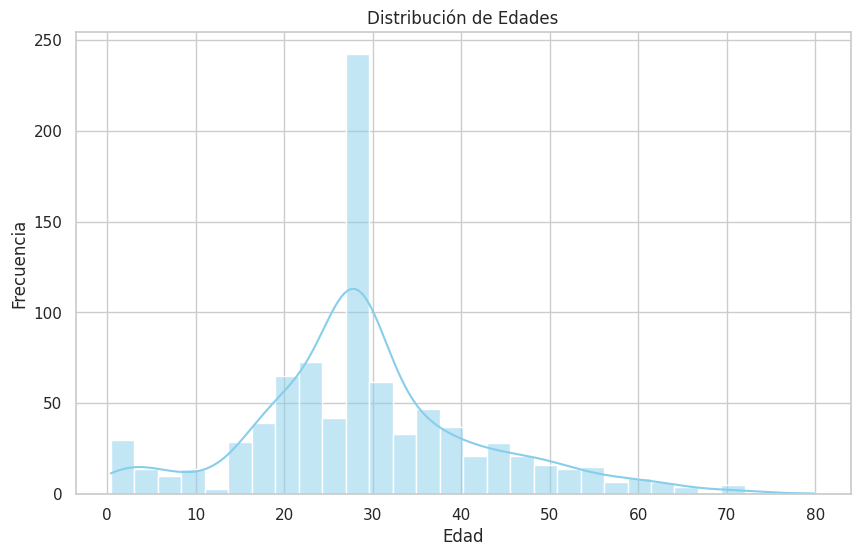

<ipython-input-1-3ef50a44f0fe>:59: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Pclass", y="Survived", data=df, ci=None, palette="Set2")
<ipython-input-1-3ef50a44f0fe>:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Pclass", y="Survived", data=df, ci=None, palette="Set2")


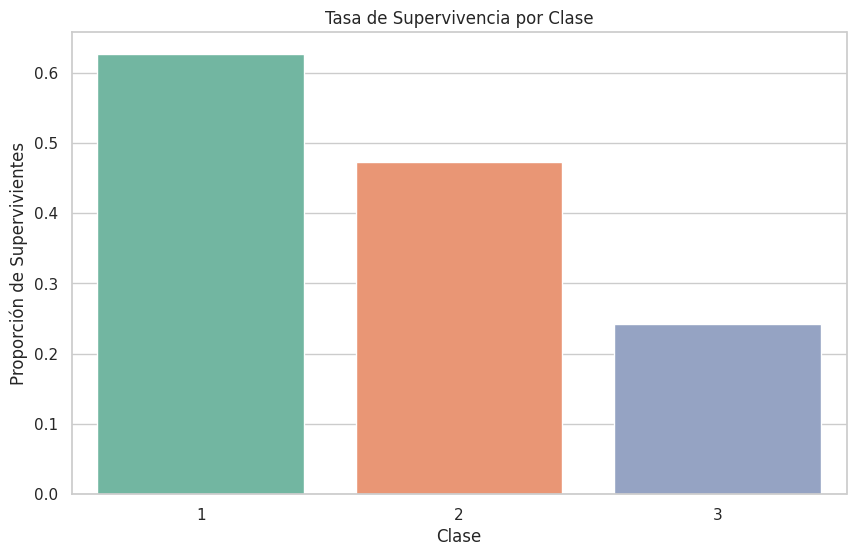

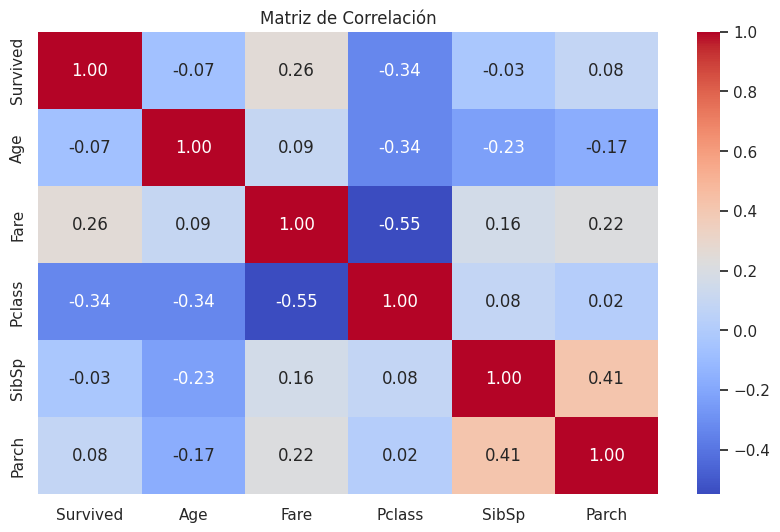

✅ Análisis exploratorio completado.


In [ ]:
# ---------------------------
# Análisis Exploratorio del Dataset Titanic
# ---------------------------

# 🔧 !pip install seaborn pandas matplotlib

# 📦 Importación de librerías
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 🎨 Estilo de gráficos
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# 📥 Cargar el dataset desde URL
URL = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(URL)

# ----------------------------
# FUNCIONES DE ANÁLISIS
# ----------------------------

def resumen_estructura(df):
    print("📋 Estructura del DataFrame")
    print(df.info())
    print("\n🔢 Tipos de Datos:\n", df.dtypes)

def estadisticas_descriptivas(df):
    print("📊 Estadísticas Descriptivas:\n")
    print(df.describe(include="all"))

def valores_faltantes(df):
    print("\n❗ Valores faltantes por columna:")
    print(df.isnull().sum())

def limpiar_datos(df):
    df = df.copy()
    # Imputar edad con la mediana
    df["Age"].fillna(df["Age"].median(), inplace=True)
    # Eliminar Cabina por alto número de NaNs
    df.drop(columns=["Cabin"], inplace=True)
    # Eliminar filas con valores faltantes restantes
    df.dropna(inplace=True)
    return df

# ----------------------------
# FUNCIONES DE VISUALIZACIÓN
# ----------------------------

def grafico_edad(df):
    sns.histplot(df["Age"], bins=30, kde=True, color="skyblue")
    plt.title("Distribución de Edades")
    plt.xlabel("Edad")
    plt.ylabel("Frecuencia")
    plt.show()

def grafico_supervivencia_clase(df):
    sns.barplot(x="Pclass", y="Survived", data=df, ci=None, palette="Set2")
    plt.title("Tasa de Supervivencia por Clase")
    plt.xlabel("Clase")
    plt.ylabel("Proporción de Supervivientes")
    plt.show()

def matriz_correlacion(df):
    corr = df[["Survived", "Age", "Fare", "Pclass", "SibSp", "Parch"]].corr()
    sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Matriz de Correlación")
    plt.show()

# ----------------------------
# EJECUCIÓN DEL ANÁLISIS
# ----------------------------

# Exploración inicial
resumen_estructura(df)
estadisticas_descriptivas(df)
valores_faltantes(df)

# Limpieza
df_limpio = limpiar_datos(df)

# Visualizaciones
grafico_edad(df_limpio)
grafico_supervivencia_clase(df_limpio)
matriz_correlacion(df_limpio)

# 🎯 Objetivo cumplido:
print("✅ Análisis exploratorio completado.")
